## Visualizing Palestine ----- Geospatial Analysis (Gaza)

  ## Palestine ❤️ <br /> Gaza


In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import logging
from shapely.geometry import box
import shapely
import plotly.express as px
import sys 
import gc ## for garbage collection  

In [5]:
## setting up logging 
logging.basicConfig(stream=sys.stdout, level=logging.INFO,
                   format='%(asctime)s %(levelname)s:%(message)s')

def subdivide_polygon(polygon, num_divisions):
    """Subdivide a polygon into smaller chuncks."""
    minx, miny, maxx, maxy = polygon.bounds
    width = (maxx - minx) / num_divisions
    height = (maxy - miny) / num_divisions
    
    sub_polygons = []
    for i in range(num_divisions):
        for j in range(num_divisions):
            sub_minx = minx + i * width
            sub_miny = miny + j * height
            sub_maxx = sub_minx + width
            sub_maxy = sub_miny + height
            sub_poly = box(sub_minx, sub_miny, sub_maxx, sub_maxy)
            sub_polygons.append(sub_poly)
    return sub_polygons
    

    

2024-08-22 18:37:34,622 INFO:Getting geometry for city: Gaza Strip
2024-08-22 18:37:34,639 INFO:Processing Sub-region 1/16
2024-08-22 18:37:38,716 INFO:Successfully downloaded road network for sub-region 1
2024-08-22 18:37:39,332 INFO:Successfully converted the graph to GeoDataFrame for sub-region 1
2024-08-22 18:37:39,602 INFO:Completed processing sub-region 1 
2024-08-22 18:37:39,602 INFO:Processing Sub-region 2/16
2024-08-22 18:37:42,513 INFO:Successfully downloaded road network for sub-region 2
2024-08-22 18:37:42,978 INFO:Successfully converted the graph to GeoDataFrame for sub-region 2
2024-08-22 18:37:43,304 INFO:Completed processing sub-region 2 
2024-08-22 18:37:43,305 INFO:Processing Sub-region 3/16
2024-08-22 18:37:43,472 INFO:Error processing for sub-region 3: No data elements in server response. Check query location/filters and log.
2024-08-22 18:37:43,472 INFO:Processing Sub-region 4/16
2024-08-22 18:37:43,643 INFO:Error processing for sub-region 4: No data elements in se

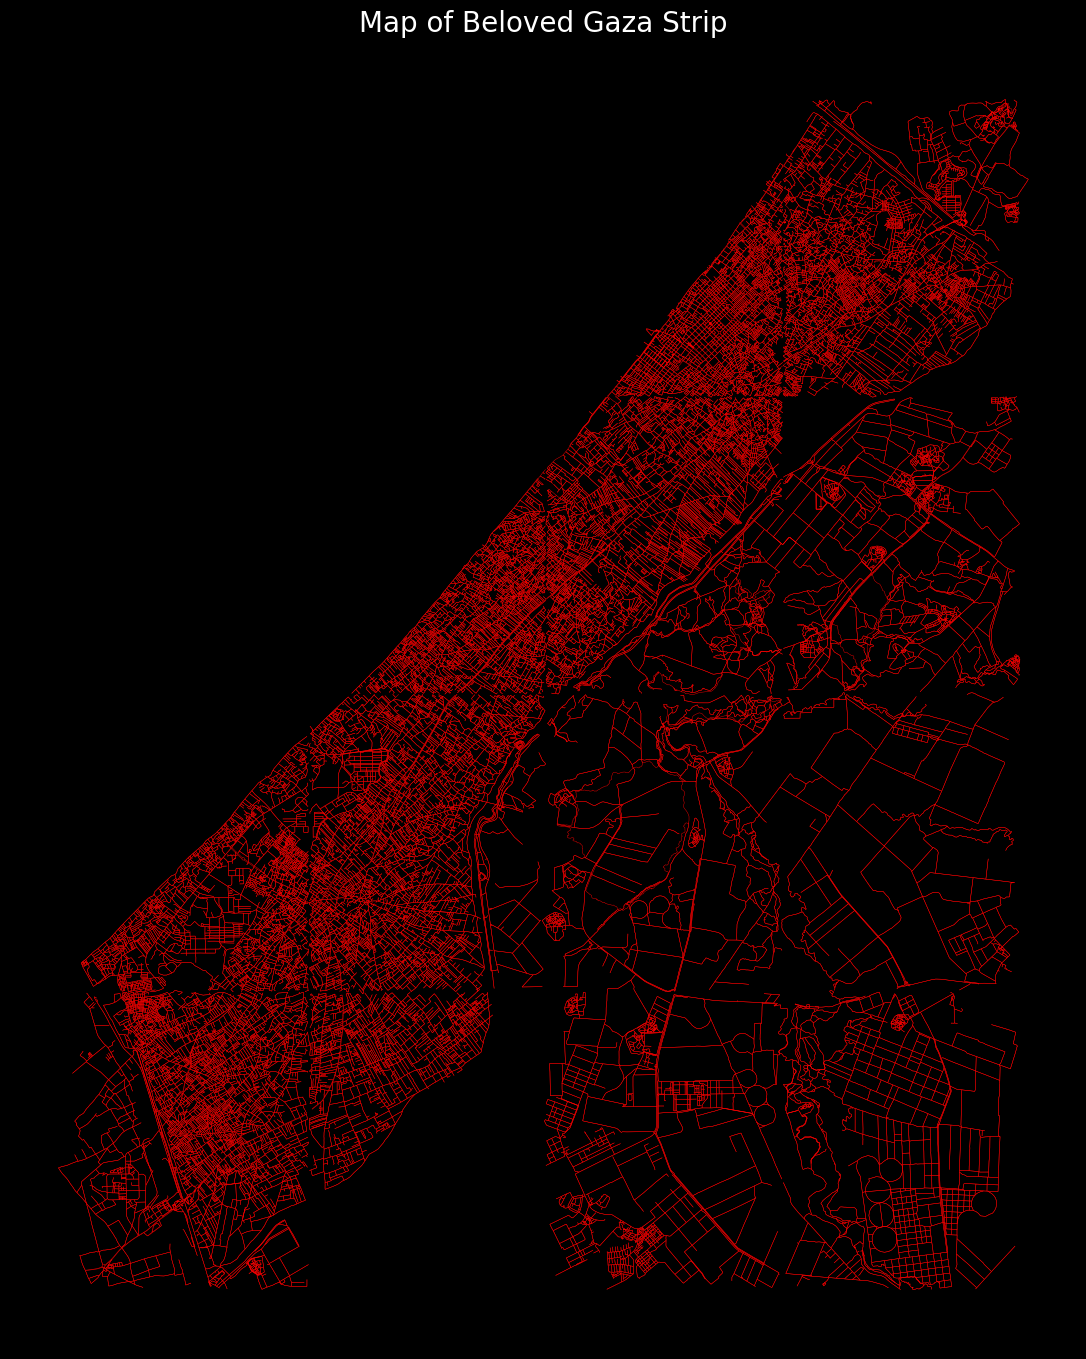

In [9]:
def process_city(city_name):
    """ Process the road network for the city."""
    #Getting the geometry 
    logging.info(f"Getting geometry for city: {city_name}")
    admin = ox.geocode_to_gdf(city_name)
    admin_poly = admin.geometry.values[0]
    
    #Subdividing the polygon
    sub_polygons = subdivide_polygon(admin_poly, num_divisions=4)
    
    
    
    # Initializing empty lists for the nodes and edges
    all_nodes = []
    all_edges = []
    
    
    #processing the sub-regions
    for i, sub_poly in enumerate(sub_polygons):
        logging.info(f"Processing Sub-region {i+1}/{len(sub_polygons)}")
        
        #downloading the road network for the sub-regions
        try:
            G = ox.graph_from_polygon(sub_poly)
            logging.info(f"Successfully downloaded road network for sub-region {i+1}")
        except Exception as e:
            logging.info(f"Error processing for sub-region {i+1}: {e}")
            continue

        # Converting the graph to GeoDAtaFrames   
        try:
            nodes, edges = ox.graph_to_gdfs(G)
            logging.info(f"Successfully converted the graph to GeoDataFrame for sub-region {i+1}")
        except Exception as e:
            logging.info(f"Error converting the graph to GeoDataFrame for sub-region {i+1}: {e}")
            continue
            
        
        
        #appending to the main lists 
        all_nodes.append(nodes)
        all_edges.append(edges)
        
        
        gc.collect() ## calling garbage collection !!!!!!
        logging.info(f"Completed processing sub-region {i+1} ")
        
    #concatenating nodes and edges    
    try:
        all_nodes = pd.concat(all_nodes, ignore_index=True)
        all_edges = pd.concat(all_edges, ignore_index=True)
        logging.info(f"Successfully concatenated all nodes and edges")
    except Exception as e:
        logging.info(f"Error concatenating nodes and edges: {e}")
        
        
        
    #Plotting the edges
    plt.style.use('dark_background')
    fig, ax = plt.subplots(1, 1, figsize=(17, 17))
    all_edges.plot(ax=ax, edgecolor='Red', linewidth=0.3)
    ax.axis('off')
    
    plt.title(f"Map of Beloved {city_name}", fontsize=20)
    plt.show()
    
    
    
#defining City name

city_name = 'Gaza Strip'
process_city(city_name)
      